In [2]:
# Import libraries
import pandas as pd
import numpy as np
from numpy import nan as NA
import random
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

In [3]:
bodyFat = pd.read_csv("bodyfat.csv") #returns dataframe

In [17]:
# View the first 5 lines of the data
bodyFat.head()

,id,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [5]:
#Data population
rows = bodyFat.shape[0]
columns = bodyFat.shape[1]
print("Rows: ", rows)
print("Columns: ", columns)


Rows:  252
Columns:  16


In [6]:
#to print names of attributes
bodyFat.columns

Index(['id', 'Density', 'bodyfat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

In [7]:
# for a column - bodyFat.columns.dtype
#to print datatypes of each attribute

bodyFat.dtypes

id           int64
Density    float64
bodyfat    float64
Age          int64
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Hip        float64
Thigh      float64
Knee       float64
Ankle      float64
Biceps     float64
Forearm    float64
Wrist      float64
dtype: object

In [8]:
# the info function can also be used
bodyFat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       252 non-null    int64  
 1   Density  252 non-null    float64
 2   bodyfat  252 non-null    float64
 3   Age      252 non-null    int64  
 4   Weight   252 non-null    float64
 5   Height   252 non-null    float64
 6   Neck     252 non-null    float64
 7   Chest    252 non-null    float64
 8   Abdomen  252 non-null    float64
 9   Hip      252 non-null    float64
 10  Thigh    252 non-null    float64
 11  Knee     252 non-null    float64
 12  Ankle    252 non-null    float64
 13  Biceps   252 non-null    float64
 14  Forearm  252 non-null    float64
 15  Wrist    252 non-null    float64
dtypes: float64(14), int64(2)
memory usage: 31.6 KB


In [9]:
print(bodyFat.isnull().sum())

id         0
Density    0
bodyfat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64


In [10]:
# Create copy of bodyFat
bodyFatMissing = bodyFat.copy()
# We will replace 20% of the data in the Abdomen column with NAs
replaceIndices = random.sample(range(0, 252), 50)
print(replaceIndices)
for item in replaceIndices:
    bodyFatMissing.loc[item, "Abdomen"] = NA

[172, 197, 43, 97, 31, 133, 21, 11, 75, 51, 147, 130, 159, 120, 64, 85, 184, 18, 25, 101, 124, 187, 121, 28, 39, 1, 114, 119, 217, 248, 178, 175, 129, 222, 14, 151, 57, 240, 203, 227, 185, 23, 154, 110, 131, 233, 211, 158, 220, 148]


In [56]:
print(bodyFatMissing.isnull().sum())

id          0
Density     0
bodyfat     0
Age         0
Weight      0
Height      0
Neck        0
Chest       0
Abdomen    50
Hip         0
Thigh       0
Knee        0
Ankle       0
Biceps      0
Forearm     0
Wrist       0
dtype: int64


In [57]:
meanReplacememt = bodyFatMissing["Abdomen"].fillna(bodyFatMissing["Abdomen"].mean())

In [58]:
medianReplacememt = bodyFatMissing["Abdomen"].fillna(bodyFatMissing["Abdomen"].median())


<Axes: ylabel='Frequency'>

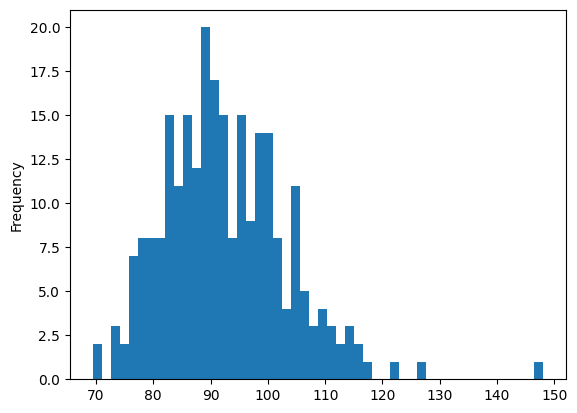

In [59]:
# Plot histograms
# original
bodyFat["Abdomen"].plot.hist(bins=50)

<Axes: ylabel='Frequency'>

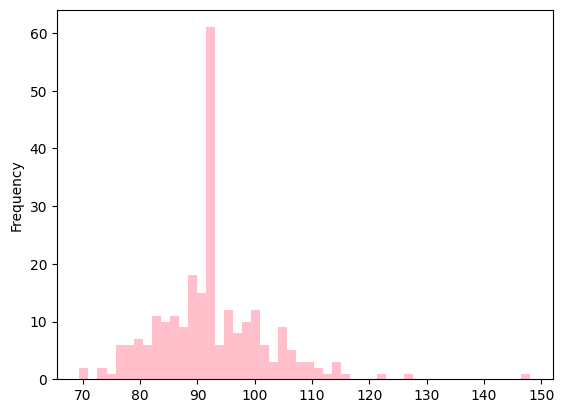

In [60]:
# mean replacement
meanReplacememt.plot.hist(bins = 50, color="pink")


<Axes: ylabel='Frequency'>

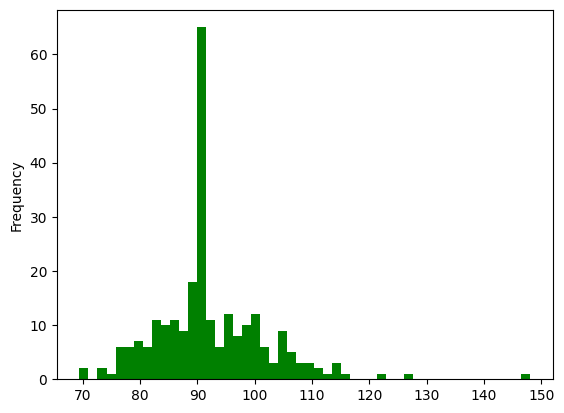

In [61]:
# median replacement
medianReplacememt.plot.hist(bins=50, color="green")


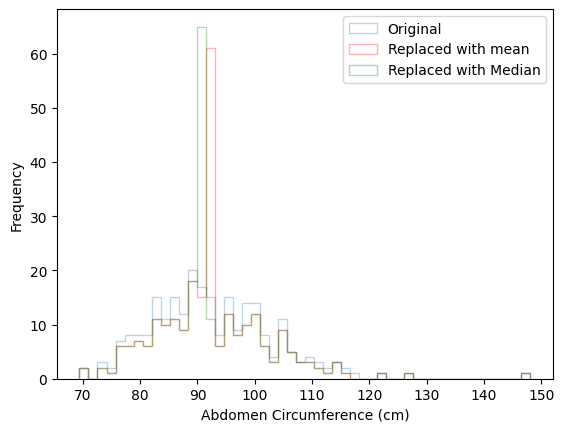

In [62]:
# Plot histograms overlaid
pyplot.hist(bodyFat["Abdomen"], bins=50, alpha=0.3, label="Original",
    histtype="step", stacked=True, fill=False)
pyplot.hist(meanReplacememt, bins=50, color="red", alpha=0.3,label="Replaced with mean",
        histtype="step", stacked=True, fill=False)
pyplot.hist(medianReplacememt, bins=50, color="green", alpha=0.3,label="Replaced with Median",
        histtype="step", stacked=True, fill=False)
pyplot.legend(loc="upper right")
pyplot.xlabel("Abdomen Circumference (cm)")
pyplot.ylabel("Frequency")
pyplot.show()

In [ ]:
sns.scatterplot(x="Age", y="Density", data=bodyFat)
ax = sns.scatterplot(x="Age", y="Density", data=bodyFat)
ax.set_title("Variation in Density and Age")
#ax.set_xlabel("In Years");

NameError: name 'bodyFat' is not defined

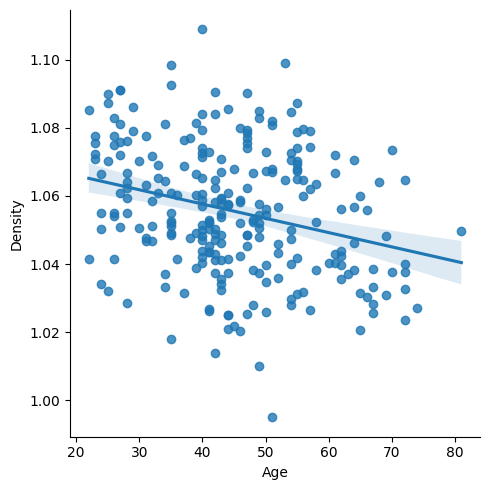

In [64]:
#draws linear model
sns.lmplot(x="Age", y="Density", data=bodyFat);

# Correlation is the statistical analysis of the relationship or dependency between two variables. Correlation allows us to study both the strength and direction of the relationship between two sets of variables.

The Pearson's correlation coefficient (r) is a score that measures the strength of a linear relationship between two variables.

In [65]:
#Find corelation between Forearm and Biceps
from scipy import stats
stats.pearsonr(bodyFat['Forearm'], bodyFat['Biceps'])

PearsonRResult(statistic=np.float64(0.6782551306850679), pvalue=np.float64(2.602222035936355e-35))

In [66]:
#find corelation
cormat = bodyFat.corr()
round(cormat,2)

,id,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
id,1.00,-0.11,0.11,0.34,0.03,0.04,0.07,0.12,0.12,-0.02,-0.08,0.05,-0.07,-0.02,0.00,0.08
Density,-0.11,1.00,-0.99,-0.28,-0.59,0.10,-0.47,-0.68,-0.80,-0.61,-0.55,-0.50,-0.26,-0.49,-0.35,-0.33
bodyfat,0.11,-0.99,1.00,0.29,0.61,-0.09,0.49,0.70,0.81,0.63,0.56,0.51,0.27,0.49,0.36,0.35
Age,0.34,-0.28,0.29,1.00,-0.01,-0.17,0.11,0.18,0.23,-0.05,-0.20,0.02,-0.11,-0.04,-0.09,0.21
Weight,0.03,-0.59,0.61,-0.01,1.00,0.31,0.83,0.89,0.89,0.94,0.87,0.85,0.61,0.80,0.63,0.73
Height,0.04,0.10,-0.09,-0.17,0.31,1.00,0.25,0.13,0.09,0.17,0.15,0.29,0.26,0.21,0.23,0.32
Neck,0.07,-0.47,0.49,0.11,0.83,0.25,1.00,0.78,0.75,0.73,0.70,0.67,0.48,0.73,0.62,0.74
Chest,0.12,-0.68,0.70,0.18,0.89,0.13,0.78,1.00,0.92,0.83,0.73,0.72,0.48,0.73,0.58,0.66
Abdomen,0.12,-0.80,0.81,0.23,0.89,0.09,0.75,0.92,1.00,0.87,0.77,0.74,0.45,0.68,0.50,0.62
Hip,-0.02,-0.61,0.63,-0.05,0.94,0.17,0.73,0.83,0.87,1.00,0.90,0.82,0.56,0.74,0.55,0.63


<Axes: >

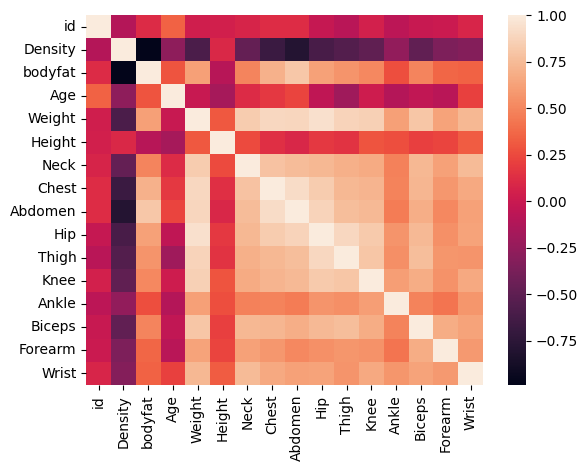

In [67]:
sns.heatmap(cormat)

In [71]:
#Discritization
bins=[18,25,35,45,60,100]
group_names = ["Youth", "YoungAdult", "Adult", "MiddleAged", "Senior"]
bodyFat["AgeGroups"] = pd.cut(bodyFat["Age"], bins, labels=group_names)
bodyFat["AgeGroups"].head(10)

0         Youth
1         Youth
2         Youth
3    YoungAdult
4         Youth
5         Youth
6    YoungAdult
7         Youth
8         Youth
9         Youth
Name: AgeGroups, dtype: category
Categories (5, object): ['Youth' < 'YoungAdult' < 'Adult' < 'MiddleAged' < 'Senior']

In [72]:
bodyFat.head()

,id,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,AgeGroups
0,1,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,Youth
1,2,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,Youth
2,3,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,Youth
3,4,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,YoungAdult
4,5,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,Youth


In [30]:
# Select numerical columns for scaling
from sklearn.preprocessing import StandardScaler
numerical_cols = [ "Density", "bodyfat", "Age", "Weight", "Height", "Neck"]
numerical_cols
scaler = StandardScaler()
bodyFat[numerical_cols] = scaler.fit_transform(bodyFat[numerical_cols])
bodyFat.head()


,id,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,AgeGroups
0,1,0.801647,-0.820246,-1.740073,-0.841246,-0.656205,-0.738665,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,Youth
1,2,1.565061,-1.562573,-1.819583,-0.193462,0.574790,0.209365,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,Youth
2,3,-0.746240,0.736245,-1.819583,-0.849769,-1.066536,-1.645475,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,Youth
3,4,1.028039,-1.047733,-1.501543,0.198617,0.574790,-0.244041,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,YoungAdult
4,5,-1.135844,1.143327,-1.660563,0.181570,0.301235,-1.480601,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,Youth


In [4]:
guitars = pd.read_csv("guitars.csv")
guitarPayment = pd.read_csv("guitarPayment.csv")
retailers = pd.read_csv("retailers.csv")

In [5]:
guitars.head()

,order_id,customer_id,brand,model,colour,use_type_id
0,47856,72,Paul Reed Smith,Custom 22,Black,3
1,47857,63,Fender,Stratocaster,Fire Engine Red,2
2,47858,60,Gibson,Les Paul Standard,Sunburst,1
3,47859,69,Ibanez,SA460QM-ABB,Antique Brown Burst,3
4,47860,33,Jackson,Dinky,Yellow,3


In [6]:
guitarPayment.head()

,cost_per_month,interest_rate_per_month,loyalty_points,order_id
0,185,2.77,1.85,47861
1,411,6.17,4.11,47862
2,420,6.30,4.20,47863
3,236,3.54,2.36,47864
4,115,1.72,1.15,47865


In [9]:
guitarPayment

,cost_per_month,interest_rate_per_month,loyalty_points,order_id
0,185,2.77,1.85,47861
1,411,6.17,4.11,47862
2,420,6.30,4.20,47863
3,236,3.54,2.36,47864
4,115,1.72,1.15,47865
5,361,5.42,3.61,47866
6,134,2.01,1.34,47867
7,347,5.21,3.47,47868
8,474,7.11,4.74,47869
9,241,3.61,2.41,47870


In [25]:
retailers.head()

,Retailer,Location,Customer,model
0,Andertons,Guildford,72,Custom 22
1,Wunjo Guitars,London,63,Stratocaster
2,Pro Musica,Cork,60,Les Paul Standard
3,Waltons,Blanchardstown,69,SA460QM-ABB
4,Music Minds,Dublin,33,Dinky


In [14]:
sns.boxplot(x=bank['Salary'], y=bank['Gender'], showmeans=True)

NameError: name 'bank' is not defined

In [26]:
mergedOne = pd.merge(guitars, guitarPayment, on='order_id', how='outer')

In [27]:
mergedOne

,order_id,customer_id,brand,model,colour,use_type_id,cost_per_month,interest_rate_per_month,loyalty_points
0,47856,72.0,Paul Reed Smith,Custom 22,Black,3.0,NaN,NaN,NaN
1,47857,63.0,Fender,Stratocaster,Fire Engine Red,2.0,NaN,NaN,NaN
2,47858,60.0,Gibson,Les Paul Standard,Sunburst,1.0,NaN,NaN,NaN
3,47859,69.0,Ibanez,SA460QM-ABB,Antique Brown Burst,3.0,NaN,NaN,NaN
4,47860,33.0,Jackson,Dinky,Yellow,3.0,NaN,NaN,NaN
5,47861,76.0,Schecter,Hellraiser,Purple,1.0,185.0,2.77,1.85
6,47862,32.0,Epihone,Dot,Sunburst,1.0,411.0,6.17,4.11
7,47863,25.0,Rickenbacker,Model 330 12,Blonde,2.0,420.0,6.30,4.20
8,47864,57.0,G&L,Fullerton,Yellow,1.0,236.0,3.54,2.36
9,47865,66.0,Charvel,Pro-Mod,Green,3.0,115.0,1.72,1.15


In [28]:
mergedTwo = pd.merge(guitars, guitarPayment, on='order_id', how='inner')

In [29]:
mergedTwo

,order_id,customer_id,brand,model,colour,use_type_id,cost_per_month,interest_rate_per_month,loyalty_points
0,47861,76,Schecter,Hellraiser,Purple,1,185,2.77,1.85
1,47862,32,Epihone,Dot,Sunburst,1,411,6.17,4.11
2,47863,25,Rickenbacker,Model 330 12,Blonde,2,420,6.30,4.20
3,47864,57,G&L,Fullerton,Yellow,1,236,3.54,2.36
4,47865,66,Charvel,Pro-Mod,Green,3,115,1.72,1.15
5,47866,51,Fender,Stratocaster,Seafoam Green,1,361,5.42,3.61
6,47867,43,Fender,Stratocaster,Yellow,1,134,2.01,1.34
7,47868,39,Epihone,Dot,Sunburst,3,347,5.21,3.47
8,47869,37,Paul Reed Smith,SE,Blue,2,474,7.11,4.74
9,47870,40,Fender,Telecaster,Blue,2,241,3.61,2.41


In [30]:
mergedThree = pd.merge(mergedTwo, retailers, how='inner')

In [31]:
mergedThree

,order_id,customer_id,brand,model,colour,use_type_id,cost_per_month,interest_rate_per_month,loyalty_points,Retailer,Location,Customer
0,47861,76,Schecter,Hellraiser,Purple,1,185,2.77,1.85,X Music,Dublin,76
1,47862,32,Epihone,Dot,Sunburst,1,411,6.17,4.11,Andertons,Guildford,32
2,47862,32,Epihone,Dot,Sunburst,1,411,6.17,4.11,Pro Musica,Cork,39
3,47868,39,Epihone,Dot,Sunburst,3,347,5.21,3.47,Andertons,Guildford,32
4,47868,39,Epihone,Dot,Sunburst,3,347,5.21,3.47,Pro Musica,Cork,39
5,47863,25,Rickenbacker,Model 330 12,Blonde,2,420,6.30,4.20,Waltons,Blanchardstown,25
6,47864,57,G&L,Fullerton,Yellow,1,236,3.54,2.36,Orpheus Music,Lagos,57
7,47865,66,Charvel,Pro-Mod,Green,3,115,1.72,1.15,Andertons,Guildford,66
8,47866,51,Fender,Stratocaster,Seafoam Green,1,361,5.42,3.61,Wunjo Guitars,London,63
9,47866,51,Fender,Stratocaster,Seafoam Green,1,361,5.42,3.61,McMaster Guitars,Glasgow,51


In [32]:
mergedThree.shape


(24, 12)

In [33]:
mergedThree = mergedThree.drop(columns = "Customer")

In [34]:
mergedThree.shape

(24, 11)

In [35]:
mergedThree.groupby("brand").agg({
    "cost_per_month": "mean",
    "interest_rate_per_month": "mean",
    "colour": pd.Series.mode
})


,cost_per_month,interest_rate_per_month,colour
brand,,,
Charvel,115.000000,1.720000,Green
Epihone,379.000000,5.690000,Sunburst
Fender,246.571429,3.700000,"[Seafoam Green, Yellow]"
G&L,236.000000,3.540000,Yellow
Gibson,351.666667,5.273333,Teaburst
Ibanez,198.000000,2.970000,Antique Brown Burst
Jackson,234.000000,3.510000,Silverburst
Paul Reed Smith,293.500000,4.400000,"[Black Cherry, Blue]"
Rickenbacker,420.000000,6.300000,Blonde
